# 1) Initial Test for Phase Space Plotting

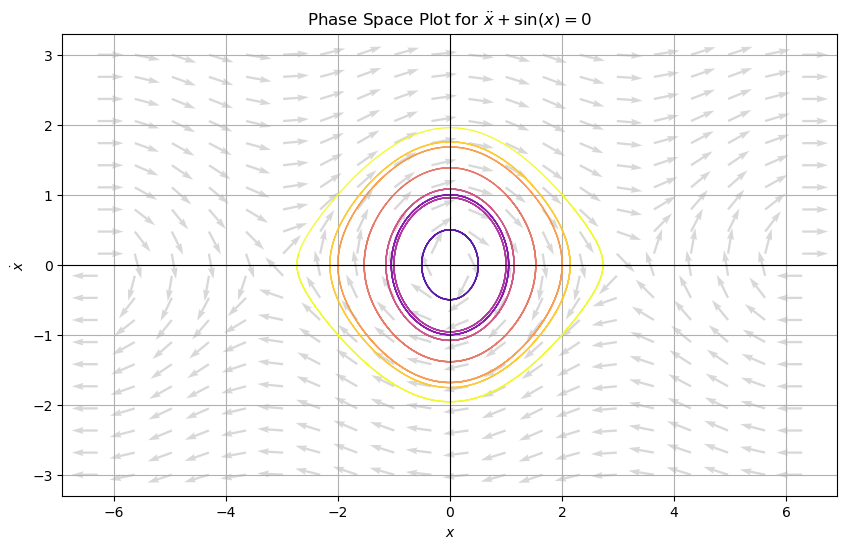

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of first-order ODEs
def phase_space_system(state, t):
    """
    Computes the derivatives dx/dt and d^2x/dt^2 for the system:
        dx/dt = v
        dv/dt = -sin(x)
    """
    x, v = state  # Unpack state vector
    dxdt = v
    dvdt = -np.sin(x)
    return [dxdt, dvdt]

# Create a grid for the phase-space plot
x_vals = np.linspace(-2*np.pi, 2*np.pi, 20)  # Position range
v_vals = np.linspace(-3, 3, 20)  # Velocity range
X, V = np.meshgrid(x_vals, v_vals)  # Mesh grid

# Compute the vector field
DX = V
DV = -np.sin(X)

# Normalize for uniform arrow sizes
norm = np.sqrt(DX**2 + DV**2)
DX, DV = DX/norm, DV/norm  

# Create the figure
plt.figure(figsize=(10, 6))

# Quiver plot with lighter arrows
plt.quiver(X, V, DX, DV, color='gray', alpha=0.3, scale=30)

# Solve for example trajectories in phase space
t = np.linspace(0, 20, 1000)  # Time for integration
initial_conditions = [[x0, v0] for x0 in np.linspace(0, 2, 3) for v0 in np.linspace(0,1,3)]

# Color gradient: cooler for stability, warmer for instability
colors = plt.cm.plasma(np.linspace(0, 1, len(initial_conditions)))
for idx, ic in enumerate(initial_conditions):
    sol = odeint(phase_space_system, ic, t)
    plt.plot(sol[:, 0], sol[:, 1], color=colors[idx % len(colors)], linestyle='-', linewidth=1, alpha=0.9)

# Labels and aesthetics
plt.xlabel(r"$x$")
plt.ylabel(r"$\dot{x}$")
plt.title("Phase Space Plot for $\ddot{x} + \sin(x) = 0$")
plt.axhline(0, color='black', linewidth=0.8)  # Horizontal axis
plt.axvline(0, color='black', linewidth=0.8)  # Vertical axis
plt.grid(True)
plt.show()


# 2) Modularizing and making it re-usable for any System of ODE

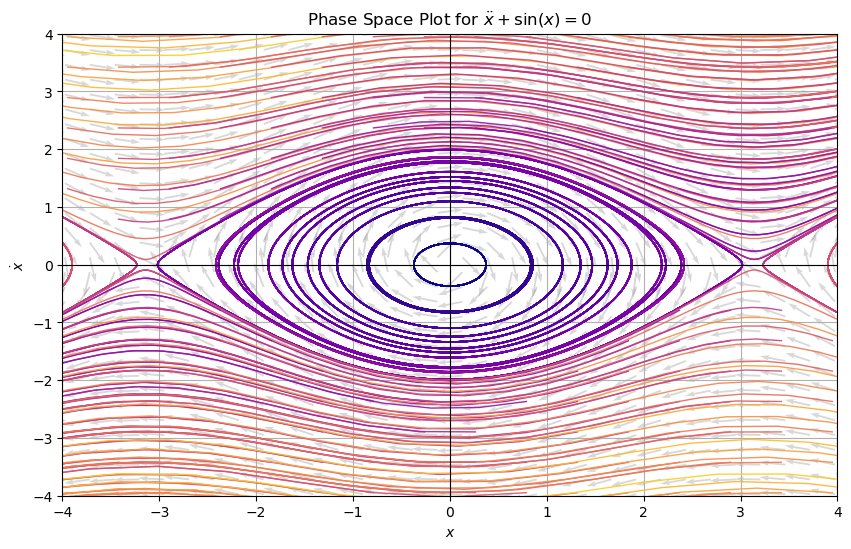

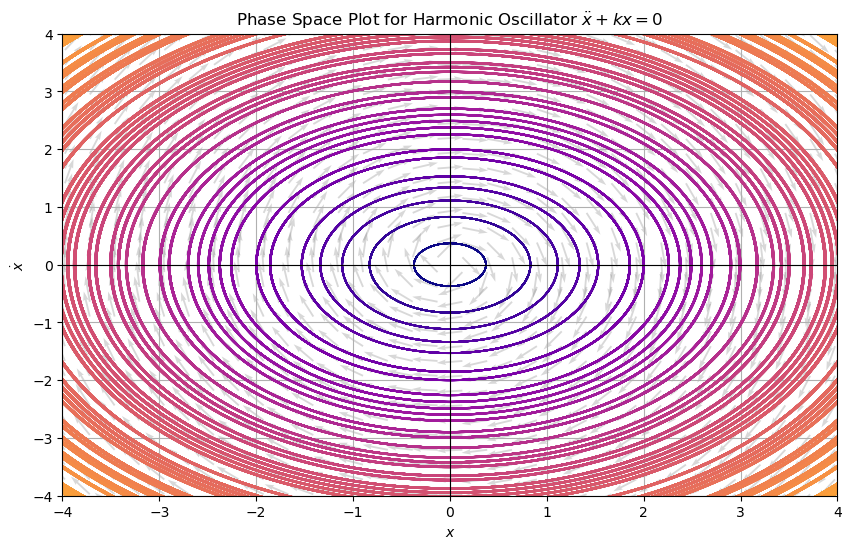

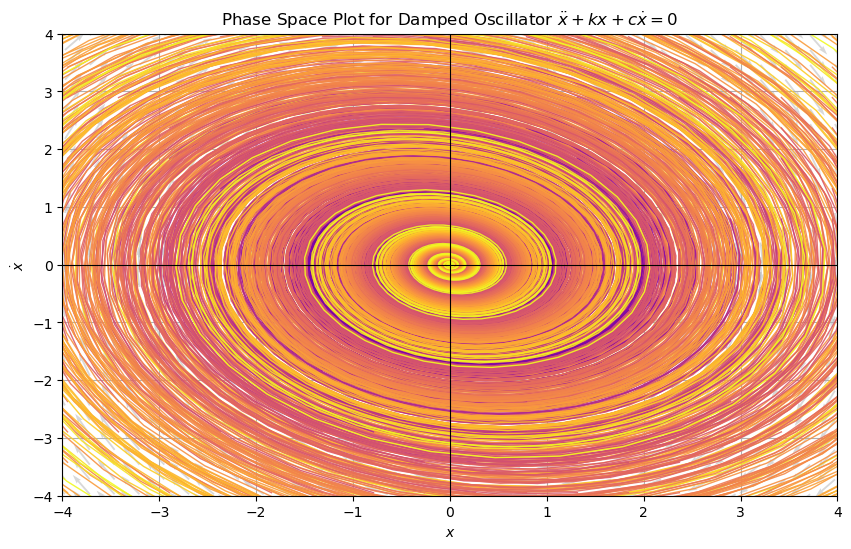

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# -----------------------------
# Define acceleration functions
# -----------------------------

# Harmonic Oscillator
def harmonic_oscillator(x, v, t, k=1):
    return -k * x

# Damped Oscillator
def damped_oscillator(x, v, t, k=1, c=0.1):
    return -k * x - c * v

# Nonlinear Pendulum
def nonlinear_pendulum(x, v, t):
    return -np.sin(x)

# -----------------------------
# Modular Phase Space System
# -----------------------------

def phase_space_system(state, t, acceleration_func):
    """
    Computes dx/dt and dv/dt for a given second-order system.

    Parameters:
        state (list): [x, v] where x is position and v is velocity.
        t (float): Time (not used in autonomous systems but included for generality).
        acceleration_func (function): Function defining acceleration f(x, v, t).

    Returns:
        list: [dx/dt, dv/dt]
    """
    x, v = state  # Unpack state vector
    dxdt = v
    dvdt = acceleration_func(x, v, t)  # Use the provided acceleration function
    return [dxdt, dvdt]

# -----------------------------
# Create a grid for the phase-space plot
# -----------------------------

def plot_phase_space(acceleration_func, title):
    """
    Plots the phase-space diagram with quiver arrows and trajectory contours.

    Parameters:
        acceleration_func (function): Function defining acceleration f(x, v, t).
        title (str): Title of the plot.
    """

    # Create grid for vector field
    x_vals = np.linspace(-5, 5, 40)  # Increase from 20 to 40
    v_vals = np.linspace(-5, 5, 40)

    X, V = np.meshgrid(x_vals, v_vals)  # Mesh grid

    # Compute the vector field dynamically
    DX = V
    DV = np.array([[acceleration_func(x, v, 0) for x, v in zip(x_row, v_row)] for x_row, v_row in zip(X, V)])

    # Normalize for uniform arrow sizes
    norm = np.sqrt(DX**2 + DV**2)
    DX, DV = DX/norm, DV/norm  

    # Create the figure
    plt.figure(figsize=(10, 6))

    # Quiver plot with lighter arrows
    plt.quiver(X, V, DX, DV, color='gray', alpha=0.3, scale=30)

    # Solve for example trajectories in phase space
    t = np.linspace(0, 100, 500)  # Time for integration
    
    # **Dynamically scale initial conditions based on acceleration**
    x_range = np.linspace(-5, 5, 20)  # Keep position range limited
    v_range = np.linspace(-5, 5, 20)  # Keep velocity within stable range

    initial_conditions = [[x0, v0] for x0 in x_range for v0 in v_range]

    # Compute radial distances for initial conditions
    radii = np.sqrt(np.array([x0**2 + v0**2 for x0, v0 in initial_conditions])) / 8
    radii_norm = (radii - np.min(radii)) / (np.max(radii) - np.min(radii))
    colors = plt.cm.plasma(radii_norm)  
    for idx, ic in enumerate(initial_conditions):
        sol = odeint(phase_space_system, ic, t, args=(acceleration_func,))
        plt.plot(sol[:, 0], sol[:, 1], color=colors[idx % len(colors)], linestyle='-', linewidth=1, alpha=0.9)

    # Labels and aesthetics
    plt.xlabel(r"$x$")
    plt.ylabel(r"$\dot{x}$")
    plt.title(title)
    plt.axhline(0, color='black', linewidth=0.8)  # Horizontal axis
    plt.axvline(0, color='black', linewidth=0.8)  # Vertical axis
    plt.grid(True)
    # **Manually configure the graph limits**
    plt.xlim(-4, 4)  # Limit x-axis range
    plt.ylim(-4, 4)  # Limit velocity range
    plt.show()

# -----------------------------
# Run phase space plots for different systems
# -----------------------------

plot_phase_space(nonlinear_pendulum, r"Phase Space Plot for $\ddot{x} + \sin(x) = 0$")
plot_phase_space(harmonic_oscillator, r"Phase Space Plot for Harmonic Oscillator $\ddot{x} + kx = 0$")
plot_phase_space(lambda x, v, t: damped_oscillator(x, v, t, k=1, c=0.2), r"Phase Space Plot for Damped Oscillator $\ddot{x} + kx + c\dot{x} = 0$")

# 3) Phase Space Plots for Duffing Equation and Numerical Check

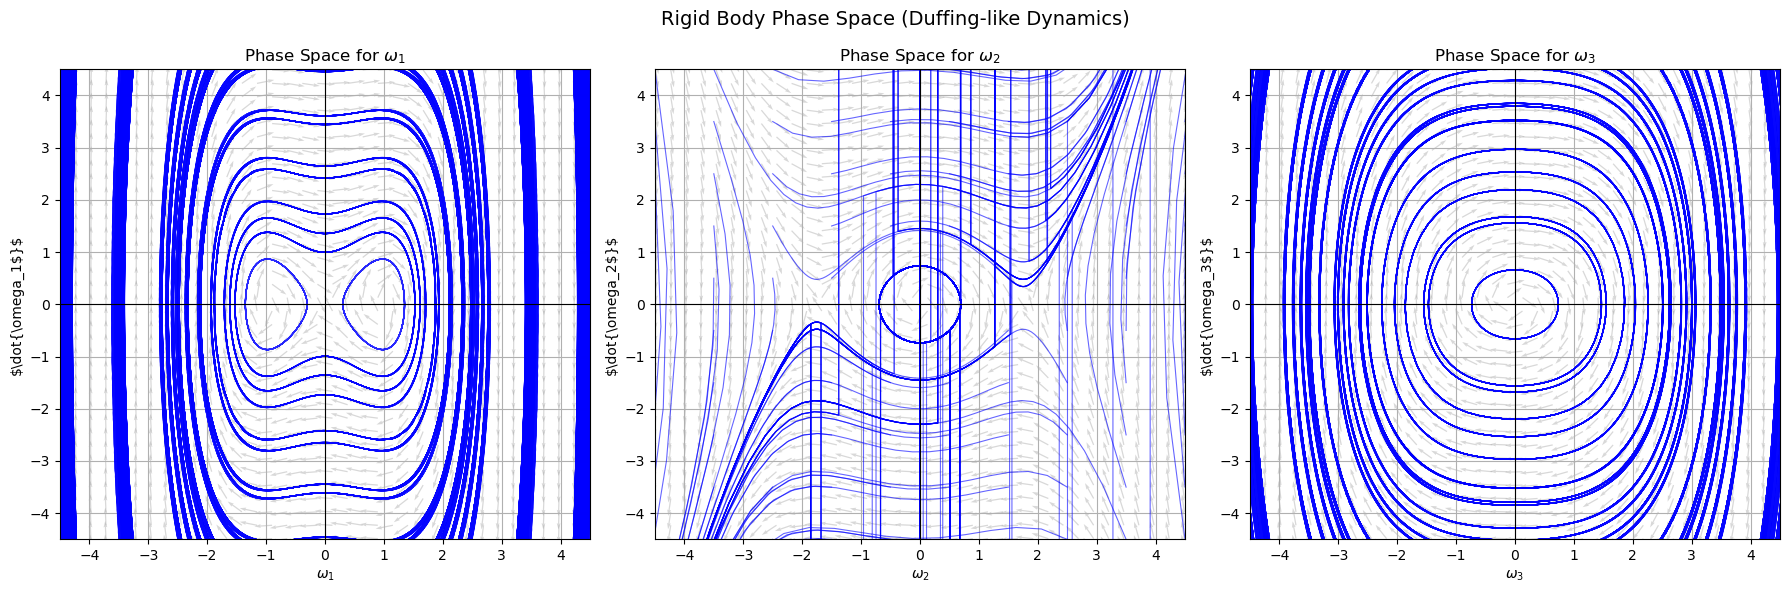

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# -------------------------------------------------------------------
# 1. Compute Duffing-Like Constants for Rigid Body in Principal Frame
# -------------------------------------------------------------------
def compute_duffing_constants(I, omega_init):
    """
    Computes the stiffness-like Duffing parameters A, B and an energy constant K
    for a rigid body with diagonal inertia (principal frame).

    Parameters:
    -----------
    I : list or tuple
        Principal moments of inertia [I1, I2, I3].
    omega_init : list or tuple
        Initial angular velocities [omega1, omega2, omega3].

    Returns:
    --------
    A : list
        Linear stiffness-like coefficients [A1, A2, A3].
    B : list
        Cubic stiffness-like coefficients [B1, B2, B3].
    K : list
        Energy-type invariants [K1, K2, K3].
    """
    I1, I2, I3 = I
    omega1, omega2, omega3 = omega_init

    # Compute squared angular momentum and kinetic energy
    H_sq = (I1**2 * omega1**2) + (I2**2 * omega2**2) + (I3**2 * omega3**2)
    T = 0.5 * (I1 * omega1**2 + I2 * omega2**2 + I3 * omega3**2)

    # Compute linear stiffness-like coefficients A_i
    A = [
        ((I1 - I2) * (2*I3*T - H_sq) + (I1 - I3) * (2*I2*T - H_sq)) / (I1*I2*I3),
        ((I2 - I3) * (2*I1*T - H_sq) + (I2 - I1) * (2*I3*T - H_sq)) / (I1*I2*I3),
        ((I3 - I1) * (2*I2*T - H_sq) + (I3 - I2) * (2*I1*T - H_sq)) / (I1*I2*I3)
    ]

    # Compute cubic stiffness-like coefficients B_i
    B = [
        (2*(I1 - I2)*(I1 - I3)) / (I2*I3),
        (2*(I2 - I1)*(I2 - I3)) / (I1*I3),
        (2*(I3 - I1)*(I3 - I2)) / (I1*I2)
    ]

    # Compute the energy-type invariants K_i (if needed)
    K = [
        ((2*I2*T - H_sq) * (H_sq - 2*I3*T)) / (I1**2 * I2 * I3),
        ((2*I3*T - H_sq) * (H_sq - 2*I1*T)) / (I1 * I2**2 * I3),
        ((2*I1*T - H_sq) * (H_sq - 2*I2*T)) / (I1 * I2 * I3**2)
    ]

    return A, B, K

# -------------------------------------------------------------------
# 2. Rigid Body Duffing ODE (3D system but each axis is decoupled)
# -------------------------------------------------------------------
def duffing_3d_ode(state, t, A, B):
    """
    Defines the time derivatives of [ω1, ω̇1, ω2, ω̇2, ω3, ω̇3] for a 
    Duffing-like rigid body rotation in principal axes.

    Parameters:
    -----------
    state : list or np.array
        [ω1, ω̇1, ω2, ω̇2, ω3, ω̇3].
    t : float
        Current time (not used explicitly in an autonomous system).
    A : list
        Linear stiffness coefficients [A1, A2, A3].
    B : list
        Cubic stiffness coefficients [B1, B2, B3].

    Returns:
    --------
    dstate_dt : list
        Time derivatives [dω1/dt, d²ω1/dt², dω2/dt, d²ω2/dt², dω3/dt, d²ω3/dt²].
    """
    # Extract each axis's ω and ω̇
    omega = state[::2]        # [ω1, ω2, ω3]
    omega_dot = state[1::2]   # [ω̇1, ω̇2, ω̇3]

    dstate_dt = []
    for i in range(3):
        # d(ω_i)/dt = ω̇_i
        dstate_dt.append(omega_dot[i])
        # d(ω̇_i)/dt = -A_i * ω_i - B_i * ω_i³
        dstate_dt.append(-A[i]*omega[i] - B[i]*(omega[i]**3))

    return dstate_dt

# -------------------------------------------------------------------
# 3. Phase Space Plotter for Each Axis (ω_i vs. ω̇_i)
# -------------------------------------------------------------------
def plot_rigid_body_phase_space(I, omega_init, title):
    """
    Plots a Duffing-like phase-space diagram for each principal axis (ω_i, ω̇_i).
    Each subplot shows a quiver (vector) field and multiple integrated trajectories.

    Parameters:
    -----------
    I : list or tuple
        Principal moments of inertia [I1, I2, I3].
    omega_init : list or tuple
        Initial angular velocities [ω1, ω2, ω3] used to compute A, B, K.
    title : str
        Title displayed above the entire figure.
    """
    # --- Compute the Duffing constants A, B, K from the *given* initial condition ---
    A, B, _ = compute_duffing_constants(I, omega_init)

    # --- Set up the grid for the phase space and create subplots ---
    omega_range = np.linspace(-5, 5, 40)
    domega_range = np.linspace(-5, 5, 40)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

    # Labels for each principal axis
    axis_labels = [r'$\omega_1$', r'$\omega_2$', r'$\omega_3$']

    for i, ax_label in enumerate(axis_labels):
        # Meshgrid for (ω_i, ω̇_i)
        Omega, DOmega = np.meshgrid(omega_range, domega_range)

        # Pre-allocate vectors for quiver
        dOmega_dt = DOmega  # d(ω_i)/dt = ω̇_i
        dDOmega_dt = np.zeros_like(Omega)  # d(ω̇_i)/dt to be computed

        # Evaluate the ODE at each point on the grid
        nrows, ncols = Omega.shape
        for row in range(nrows):
            for col in range(ncols):
                # Build a 6D state, but only set the i-th axis
                full_state = [0.0]*6
                full_state[2*i]   = Omega[row, col]   # ω_i
                full_state[2*i+1] = DOmega[row, col]  # ω̇_i

                derivatives = duffing_3d_ode(full_state, 0, A, B)
                dDOmega_dt[row, col] = derivatives[2*i+1]  # the second derivative for axis i

        # --- Normalize to avoid large arrow differences (and add epsilon to avoid divide by zero) ---
        epsilon = 1e-9
        norm = np.sqrt(dOmega_dt**2 + dDOmega_dt**2) + epsilon
        dOmega_dt_norm = dOmega_dt / norm
        dDOmega_dt_norm = dDOmega_dt / norm

        # Quiver plot
        axes[i].quiver(
            Omega, DOmega,
            dOmega_dt_norm, dDOmega_dt_norm,
            color='gray', alpha=0.3, scale=30
        )

        # --- Integrate trajectories for a range of initial conditions in (ω_i, ω̇_i) ---
        t_vals = np.linspace(0, 50, 500)
        ic_grid = [
            (o0, odot0)
            for o0 in np.linspace(-4.5, 4.5, 10)
            for odot0 in np.linspace(-4.5, 4.5, 10)
        ]

        for (o0, odot0) in ic_grid:
            # Full 6D state again, only axis i is set to o0, odot0
            state_init = [0.0]*6
            state_init[2*i]   = o0
            state_init[2*i+1] = odot0

            sol = odeint(duffing_3d_ode, state_init, t_vals, args=(A, B))
            # Plot (ω_i, ω̇_i) from solution
            axes[i].plot(sol[:, 2*i], sol[:, 2*i+1],
                         color='blue', alpha=0.6, linewidth=0.8)

        # --- Cosmetics & labeling ---
        axes[i].set_xlabel(ax_label)
        axes[i].set_ylabel(r"$\dot{{{}}}$".format(ax_label[1:]))  # e.g., \dot{\omega_1}
        axes[i].set_title(f"Phase Space for {ax_label}")
        axes[i].axhline(0, color='black', linewidth=0.8)
        axes[i].axvline(0, color='black', linewidth=0.8)
        axes[i].grid(True)
        axes[i].set_xlim([-4.5, 4.5])
        axes[i].set_ylim([-4.5, 4.5])

    fig.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# -------------------------------------------------------------------
# Example Usage
# -------------------------------------------------------------------
if __name__ == "__main__":
    # Example principal moments of inertia
    I_values = [5.0, 3.0, 2.0]

    # Non-zero initial angular velocities (for A, B computation)
    initial_omega = [1.0, -0.5, 0.8]

    plot_rigid_body_phase_space(
        I_values,
        omega_init=initial_omega,
        title="Rigid Body Phase Space (Duffing-like Dynamics)"
    )
